A continuación, realizaré un análisis centrado en la relación entre el nivel de felicidad de los países y su Producto Interno Bruto (GDP), con base en datos extraídos de dos fuentes confiables: el World Happiness Report (WHR) del año 2022 y los registros de GDP del año 2020 publicados por The World Bank. Este estudio tiene como objetivo identificar si existe una asociación significativa entre estas variables mediante la aplicación de un modelo de regresión lineal simple.

Para realizar este análisis, emplearé un archivo de datos titulado "Felicidad y GDP.csv", que contiene información sobre el nivel de felicidad (en una escala del 0 al 10) y el GDP de varios países. Se incluirán las gráficas y cálculos pertinentes para justificar las conclusiones obtenidas.

Además, adjunto el archivo de Excel que contiene los datos utilizados como fuente primaria para este estudio

In [18]:
# Importar datos del archivo "Felicidad y GDP.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm


datos = pd.read_csv("A1.2 Felicidad y GDP.csv")
datad = datos.sort_values("Felicidad", ascending=False) # orden de datos decreciente Felicidad
dataa = datos.sort_values("GDP", ascending=False) # orden de datos decreciente GDP

print(datad.head(10))
print(dataa.head(10))

          Pais  Felicidad           GDP
0      Finland     7.8210  2.720000e+11
1      Denmark     7.6362  3.560000e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.520000e+11
4  Netherlands     7.4149  9.140000e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.410000e+11
7       Norway     7.3651  3.620000e+11
8       Israel     7.3638  4.070000e+11
9  New Zealand     7.1998  2.120000e+11
               Pais  Felicidad           GDP
15    United States     6.9768  2.090000e+13
70            China     5.5853  1.470000e+13
52            Japan     6.0389  5.040000e+12
13          Germany     7.0341  3.850000e+12
16   United Kingdom     6.9425  2.760000e+12
130           India     3.7771  2.670000e+12
19           France     6.6867  2.630000e+12
29            Italy     6.4667  1.890000e+12
14           Canada     7.0251  1.650000e+12
57      South Korea     5.9351  1.640000e+12


A continuación, realizaré las gráficas necesarias para visualizar la relación entre el nivel de felicidad y el Producto Interno Bruto (GDP). Estas gráficas me permitirán identificar patrones, tendencias y posibles asociaciones entre las variables estudiadas. Para ello:

Representaré las observaciones usando una gráfica de dispersión, donde el eje "y" representará los niveles de felicidad y el eje "x" el logaritmo base 10 del GDP. Este enfoque permitirá analizar de forma más clara la relación, al ajustar la escala del GDP.



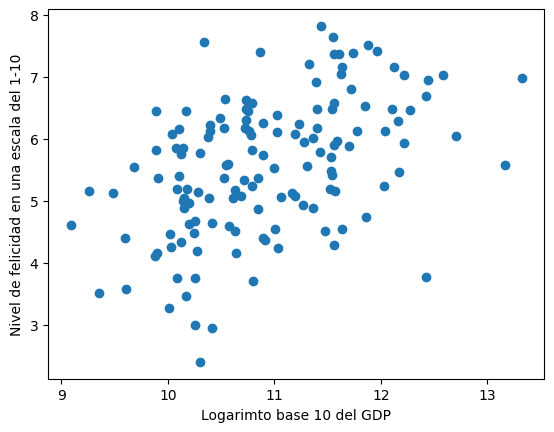

In [19]:
y = datos.Felicidad
x = np.log10(datos['GDP'])

plt.scatter(x,y)  # Esta función nos ayuda a hacer una grafica de disepersión
# Nombramos "x" y "y" en la gráfica
plt.ylabel("Nivel de felicidad en una escala del 1-10")
plt.xlabel("Logarimto base 10 del GDP")
plt.show() # mostramos la gráfica

A continuación, procederemos a calcular los valores de B0 y B1 utilizando las siguientes fórmulas:

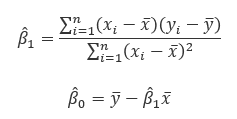


In [20]:
# Primero calculamos el promedio de ambas variables
yprom = np.mean(y)
xprom = np.mean(x)

# Primero calculamos B1
b1num = sum((x-xprom)*(y-yprom))
b1den = sum((x-xprom)**2)
b1 = b1num/b1den
# Ya con B1 calculamos B0
b0 = yprom - (b1*xprom)
# Imprimimos ambos coeficientes
print("B1 = ",b1)
print("B0 = ",b0)

B1 =  0.6280216697450538
B0 =  -1.3012360953433797


Una vez que hemos obtenido ambos coeficientes, podemos proceder a realizar una gráfica que los incorpore.

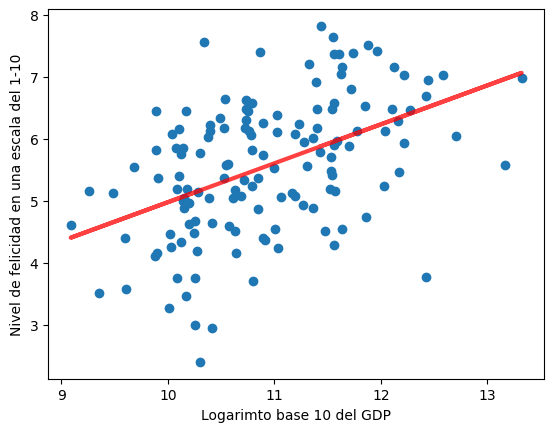

In [21]:
# A continuación volvemos a generar la gráfica
plt.scatter(x,y)
plt.ylabel("Nivel de felicidad en una escala del 1-10")
plt.xlabel("Logarimto base 10 del GDP")

yHat = b0 + b1*x
# Agregamos la línea que representa el modelo
plt.plot(x,yHat,c = "r", linewidth = 3, alpha = 0.75)
# Por ultimo mostramos la gráfica
plt.show()

A continuación, calcularemos el Error de Suma de Residuos (RSS) para medir la diferencia entre los valores reales y los predichos por el modelo. Este cálculo nos ayudará a evaluar la precisión del modelo en los siguientes pasos.

In [22]:
RSS = sum((y-yHat)**2)
print("RSS = ",RSS)

RSS =  131.379585014422



A continuación, calcularemos el error estándar (SE) y el intervalo de confianza para el coeficiente estimado B1.Estos valores nos permitirán evaluar la precisión de la estimación del modelo. Además, determinaremos si existe una asociación significativa entre la felicidad y el GDP en esta población, utilizando métricas calculadas para justificar nuestra conclusión

In [23]:
# Calculamos el error estándar de B1
num = len(x)
SE1 = np.sqrt(RSS/((num-2)*sum((x-xprom)**2)))
print("SE1 = ",SE1)

# Ahora calculamos el intervalo de confianza
p = st.t.interval(0.95, num-2)[1]
CIl = b1 - p*SE1
CIU = b1 + p*SE1
print("Cil = ",CIl)
print("CIU = ",CIU)

SE1 =  0.0998266715050003
Cil =  0.430646598536772
CIU =  0.8253967409533356



Ahora que hemos calculado el error estándar (SE) y el intervalo de confianza, procederemos a analizar la relación entre la felicidad y el logaritmo base 10 del GDP calculando el estadístico
𝑡
 y el valor
𝑝
. Esto nos permitirá evaluar la relevancia de esta relación en los datos.

In [24]:
# Se calcula el valor estadistico t y el valor p asociado
t = b1 / SE1
pv = st.t.sf(abs(t),num-2)*2

# Imprimimos ambos valores
print ( "Valor estadístico t =",t)
print ("Valor de p = ",pv)

Valor estadístico t = 6.291121002803307
Valor de p =  3.837657457637702e-09



En el siguiente paso, calcularemos el Error Estándar Residual (RSE) y el coeficiente de determinación (R^2
 ). El RSE nos permitirá medir qué tan bien se ajusta el modelo a los datos observados, mientras que el
𝑅^2
  evaluará la proporción de la variabilidad en la felicidad que puede explicarse por el logaritmo base 10 del GDP. Estos valores serán clave para analizar la calidad del modelo de regresión.

In [25]:
# Calculamos RSE , TSS y R2
RSE = np.sqrt(RSS/(num-2))
TSS = sum((y-yprom)**2)
R2 = 1 - (RSS/TSS)

# Imprimimos los resultados
print("RSE = ",RSE)
print("R2 = ",R2)

# Comentario sobre R^2
print("\nComentario sobre el R^2:")
print("El valor de R^2 refleja que la variable independiente solo explica una parte limitada de la variable dependiente.")
print("Aunque hay evidencia de una relación, el modelo no captura completamente la variabilidad, por lo que podría usarse otro modelo")

RSE =  0.9722020729289526
R2 =  0.22162953094182025

Comentario sobre el R^2:
El valor de R^2 refleja que la variable independiente solo explica una parte limitada de la variable dependiente.
Aunque hay evidencia de una relación, el modelo no captura completamente la variabilidad, por lo que podría usarse otro modelo


En este último paso, utilizaremos la función OLS() de la librería statsmodels para verificar que los resultados obtenidos en los pasos anteriores son correctos. Esta función nos proporcionará un resumen detallado del modelo, incluyendo el valor del
𝑅
2
 , el error estándar residual (RSE) y el
𝑝
-valor, entre otros. Compararemos estos resultados con los cálculos manuales para confirmar su coherencia y vali

In [26]:
# Utilizamos el OLS para comporar los resultados con nuestro modelo
modelo = sm.OLS(y,sm.add_constant(x))
r = modelo.fit()
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.58
Date:                Mon, 27 Jan 2025   Prob (F-statistic):           3.84e-09
Time:                        19:34:34   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3012      1.094     -1.190      0.2

In [29]:
print("valor p: ")
print(r.pvalues[1])
print("RSE =", r.scale**.5)

valor p: 
3.837657457637758e-09
RSE = 0.9722020729289526


<ipython-input-29-c8f59db2c85a>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(r.pvalues[1])
